## Time series of Atkin et al. respiration run - grid cells that die off

### Libraries

In [1]:
import numpy as np
import xarray as xr
import csv
import pandas as pd

import functions_py.fates_xarray_functions as fa

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm


### Plotting options

In [2]:
min_lat_plotting = -90
max_lat_plotting = 90
min_lon_plotting = -180
max_lon_plotting = 180
geog_range_plotting = [min_lon_plotting, max_lon_plotting, min_lat_plotting, max_lat_plotting]

pfts = ['broadleaf_evergreen_tropical_tree','needleleaf_evergreen_extratrop_tree',
         'needleleaf_colddecid_extratrop_tree','broadleaf_evergreen_extratrop_tree',
        'broadleaf_hydrodecid_tropical_tree','broadleaf_colddecid_extratrop_tree',
        'broadleaf_evergreen_extratrop_shrub','broadleaf_hydrodecid_extratrop_shrub',
        'broadleaf_colddecid_extratrop_shrub', 'arctic_c3_grass',
        'cool_c3_grasss','c4_grass']


# colours for canopy/understory and FATES/Data
dark = cm.get_cmap('Paired', 12)
colormap = dark(range(12))

### Load FATES run

In [3]:
# Old allometries and 1.2 storage
#fates_history_file_def = '/compyfs/need138/elm_runs/atkinr1_ensemble_default.Ec63cce2-Fc8e49cb.2023-01-03/run/lnd/hist/atkinr1_ensemble_default.Ec63cce2-Fc8e49cb.2023-01-03.elm.h0.start.nc'

# New allometries and 1.6 storage
#fates_history_file_def = '/compyfs/need138/elm_runs/atkin_storage.Ec63cce2-F0866bca.2023-01-06/run/lnd/hist/atkin_storage.Ec63cce2-F0866bca.2023-01-06.elm.h0.start.nc'
fates_history_file_def = '/compyfs/need138/elm_runs/atkin_hard_coded_tgrowth.Ec63cce2-F9191803.2023-01-10/run/lnd/hist/atkin_hard_coded_tgrowth.Ec63cce2-F9191803.2023-01-10.elm.h0.firsttwenty.nc'
fates_def = xr.open_dataset(fates_history_file_def,  decode_times=False)

nyears = int(len(fates_def.variables['time'])/12)
n_lat = len(fates_def.variables['lat'])
n_lon = len(fates_def.variables['lon'])

tave_start = (nyears-5)*12
tave_stop = nyears*12

cohort_size_bins = fates_def.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)

time = fates_def.variables['time'] / 365.


In [4]:
print(fates_def.lat[22])
print(fates_def.lon[56])
print(fates_def.lon[57])

<xarray.DataArray 'lat' ()>
array(-2., dtype=float32)
Coordinates:
    lat      float32 -2.0
Attributes:
    long_name:  coordinate latitude
    units:      degrees_north
<xarray.DataArray 'lon' ()>
array(280., dtype=float32)
Coordinates:
    lon      float32 280.0
Attributes:
    long_name:  coordinate longitude
    units:      degrees_east
<xarray.DataArray 'lon' ()>
array(285., dtype=float32)
Coordinates:
    lon      float32 285.0
Attributes:
    long_name:  coordinate longitude
    units:      degrees_east


### Time series of aboveground biomass

(240, 46, 72)


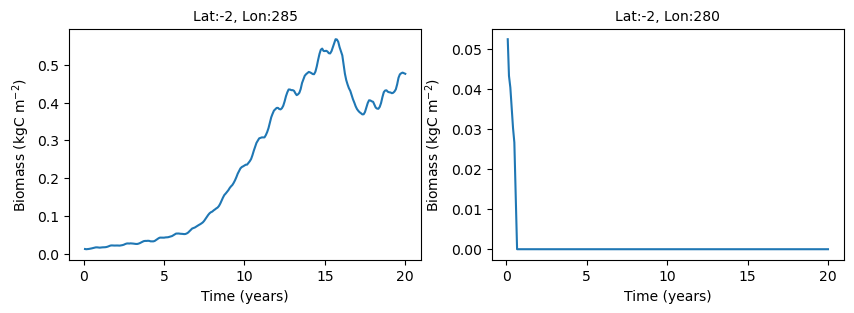

In [5]:
biomass = fates_def.FATES_VEGC
print(biomass.shape)

biomass_good = biomass[:,22,57]
biomass_bad = biomass[:,22,56]

fig3, ((f3ax0, f3ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(10,3))

### AGB
f3ax0.plot(time,biomass_good)
f3ax0.set_title(r'Lat:-2, Lon:285', fontsize = 10)
f3ax0.set_ylabel('Biomass (kgC m$^{-2}$)', fontsize = 10)
f3ax0.set_xlabel('Time (years)', fontsize=10)
f3ax0.tick_params(labelsize=10)

f3ax1.plot(time,biomass_bad)
f3ax1.set_title(r'Lat:-2, Lon:280', fontsize = 10)
f3ax1.set_ylabel('Biomass (kgC m$^{-2}$)', fontsize = 10)
f3ax1.set_xlabel('Time (years)', fontsize=10)
f3ax1.tick_params(labelsize=10)


### Growth

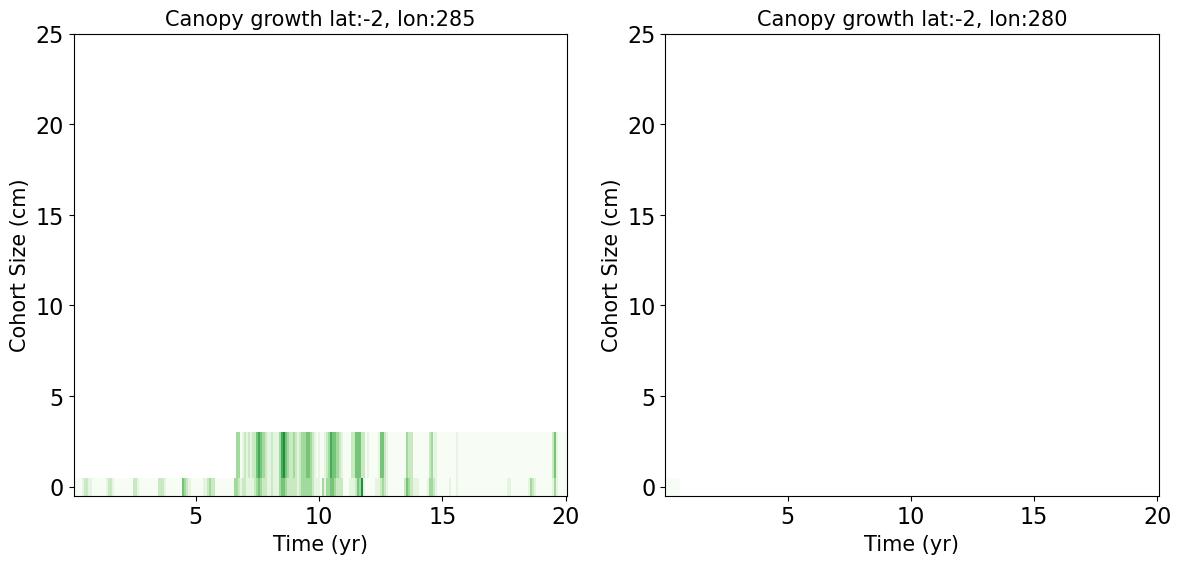

In [6]:
ddbh_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_DDBH_CANOPY_SZPF, fates_def)
ddbh_def = ddbh_sz_by_pft_def[:,0,:,:,:]  # PFT 1
nplnt_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_NPLANT_CANOPY_SZPF, fates_def)
nplnt_def = nplnt_sz_by_pft_def[:,0,:,:,:]
ddbh_def = ddbh_def/nplnt_def

ddbh_def_good = ddbh_def[:,22,57,:]
ddbh_def_bad = ddbh_def[:,22,56,:]


levels = np.arange(0.,0.01, 0.001)
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


fig1, ((f1ax0, f1ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

im = f1ax0.pcolormesh(time, cohort_size_bins[0:5], ddbh_def_good[:,0:5].transpose(),
                      cmap=cmap, norm=norm)
f1ax0.set_title(r'Canopy growth lat:-2, lon:285', fontsize=15)
f1ax0.set_xlabel('Time (yr)', fontsize=15)
f1ax0.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax0.tick_params(labelsize=16)

im = f1ax1.pcolormesh(time, cohort_size_bins[0:5], ddbh_def_bad[:,0:5].transpose(), 
                      cmap=cmap, norm=norm)
f1ax1.set_title(r'Canopy growth lat:-2, lon:280', fontsize=15)
f1ax1.set_xlabel('Time (yr)', fontsize=15)
f1ax1.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax1.tick_params(labelsize=16)

### Mortality

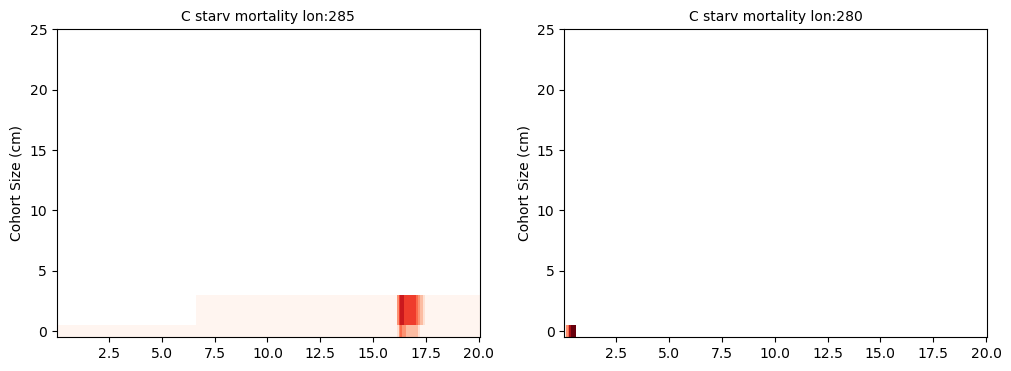

In [7]:
nplnt_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_NPLANT_SZPF, fates_def)
nplnt_def = nplnt_sz_by_pft_def[:,0,:,:,:]

m3_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_MORTALITY_CSTARV_SZPF, fates_def)
m3_def = m3_sz_by_pft_def[:,0,:,:,:]  # PFT 1
m3_def = m3_def/nplnt_def

m3_good = m3_def[:,22,57,:]
m3_bad = m3_def[:,22,56,:]



levels = np.arange(0.,0.5, 0.05)
cmap = plt.get_cmap('Reds')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


fig1, ((f1ax0, f1ax1)) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))


im = f1ax0.pcolormesh(time, cohort_size_bins[0:5], m3_good[:,0:5].transpose(),
                      cmap=cmap, norm=norm)
f1ax0.set_title(r'C starv mortality lon:285', fontsize=10)
f1ax0.set_ylabel('Cohort Size (cm)', fontsize=10)
f1ax0.tick_params(labelsize=10)

im = f1ax1.pcolormesh(time, cohort_size_bins[0:5], m3_bad[:,0:5].transpose(),
                      cmap=cmap, norm=norm)
f1ax1.set_title(r'C starv mortality lon:280', fontsize=10)
f1ax1.set_ylabel('Cohort Size (cm)', fontsize=10)
f1ax1.tick_params(labelsize=10)




### Seasonal cycle of GPP

(240, 12, 46, 72)


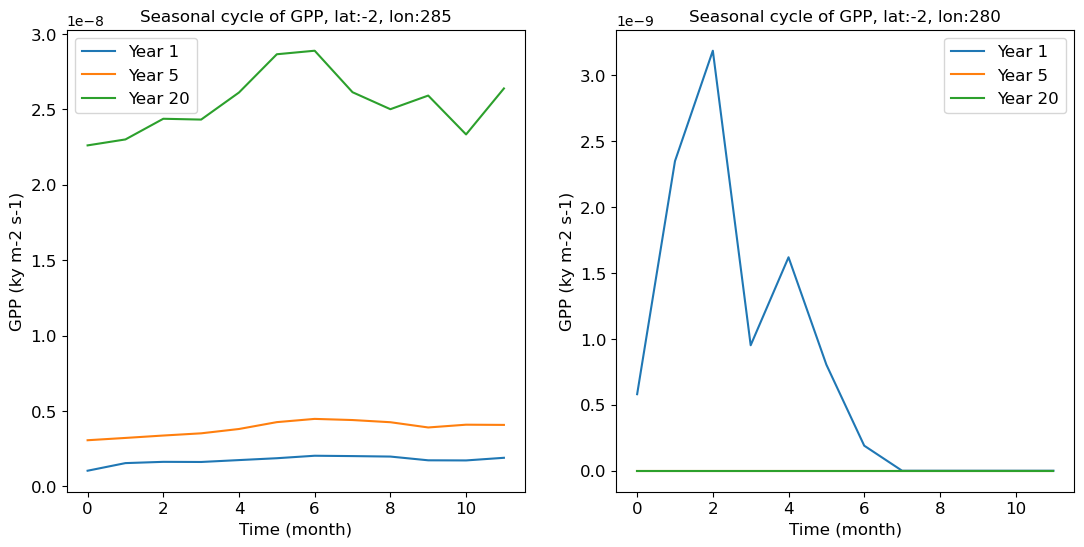

In [8]:
gpp_pf = fates_def.FATES_GPP_PF
print(gpp_pf.shape)

# subset by area and just get PFT 1
gpp_good = gpp_pf[:,0,22,57]
gpp_bad = gpp_pf[:,0,22,56]

fig3, ((f3ax0,f3ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(13,6))

### AGB
f3ax0.plot(gpp_good[0:12], label = 'Year 1')
f3ax0.plot(gpp_good[48:60], label = 'Year 5')
f3ax0.plot(gpp_good[228:], label = 'Year 20')

f3ax0.set_title(r'Seasonal cycle of GPP, lat:-2, lon:285', fontsize = 12)
f3ax0.set_ylabel('GPP (ky m-2 s-1)', fontsize = 12)
f3ax0.set_xlabel('Time (month)', fontsize=12)
f3ax0.tick_params(labelsize=12)
f3ax0.legend(prop={'size':12})


f3ax1.plot(gpp_bad[0:12], label = 'Year 1')
f3ax1.plot(gpp_bad[48:60], label = 'Year 5')
f3ax1.plot(gpp_bad[228:], label = 'Year 20')

f3ax1.set_title(r'Seasonal cycle of GPP, lat:-2, lon:280', fontsize = 12)
f3ax1.set_ylabel('GPP (ky m-2 s-1)', fontsize = 12)
f3ax1.set_xlabel('Time (month)', fontsize=12)
f3ax1.tick_params(labelsize=12)
f3ax1.legend(prop={'size':12})


### Seasonal cycle of cmort

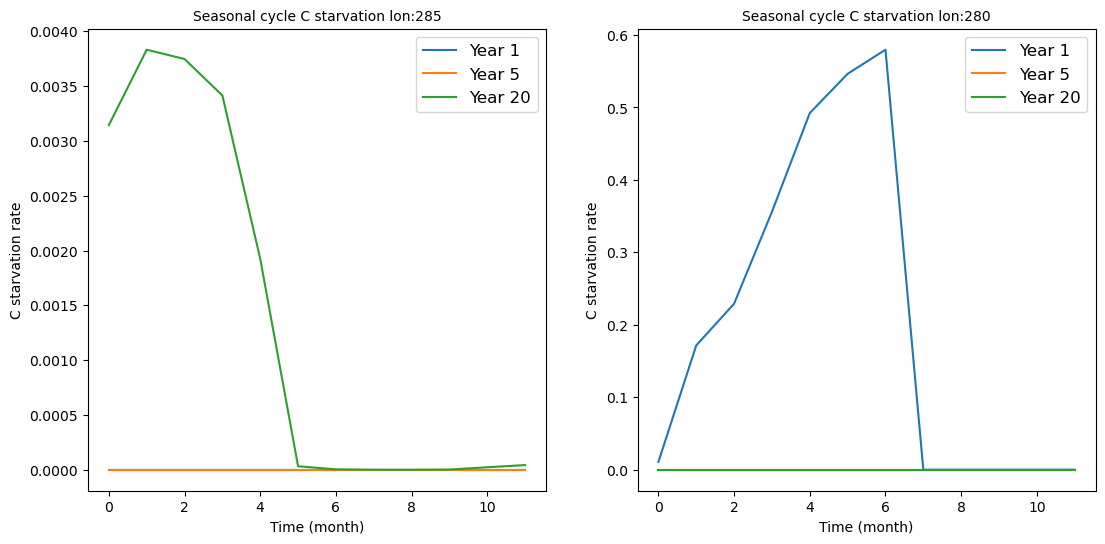

In [9]:
nplnt_sz_by_pft_canopy_def = fa.scpf_to_scls_by_pft(fates_def.FATES_NPLANT_CANOPY_SZPF, fates_def)
nplnt_canopy_def = nplnt_sz_by_pft_canopy_def[:,0,:,:,:]  # PFT 1

m3_sz_by_pft_canopy_def = fa.scpf_to_scls_by_pft(fates_def.FATES_M3_MORTALITY_CANOPY_SZPF, fates_def)
m3_canopy_def = m3_sz_by_pft_canopy_def[:,0,:,:,:]  # PFT 1
m3_canopy_def = m3_canopy_def/nplnt_canopy_def

m3_canopy_good = m3_canopy_def[:,22,57,:]
m3_canopy_good = np.sum(m3_canopy_good, axis=1)  # sum over size classes (only in size bin one anyway)

m3_canopy_bad = m3_canopy_def[:,22,56,:]
m3_canopy_bad = np.sum(m3_canopy_bad, axis=1)  # sum over size classes (only in size bin one anyway)


fig1, ((f1ax0,f1ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(13,6))

f1ax0.plot(m3_canopy_good[0:12], label = 'Year 1')
f1ax0.plot(m3_canopy_good[48:60],label = 'Year 5')
f1ax0.plot(m3_canopy_good[228:],label = 'Year 20')
f1ax0.set_title(r'Seasonal cycle C starvation lon:285', fontsize=10)
f1ax0.set_ylabel('C starvation rate', fontsize=10)
f1ax0.set_xlabel('Time (month)', fontsize=10)
f1ax0.tick_params(labelsize=10)
f1ax0.legend(prop={'size':12})

f1ax1.plot(m3_canopy_bad[0:12], label = 'Year 1')
f1ax1.plot(m3_canopy_bad[48:60],label = 'Year 5')
f1ax1.plot(m3_canopy_bad[228:],label = 'Year 20')
f1ax1.set_title(r'Seasonal cycle C starvation lon:280', fontsize=10)
f1ax1.set_ylabel('C starvation rate', fontsize=10)
f1ax1.set_xlabel('Time (month)', fontsize=10)
f1ax1.tick_params(labelsize=10)
f1ax1.legend(prop={'size':12})



### NPP

(240, 12, 46, 72)
(12,)
(12,)


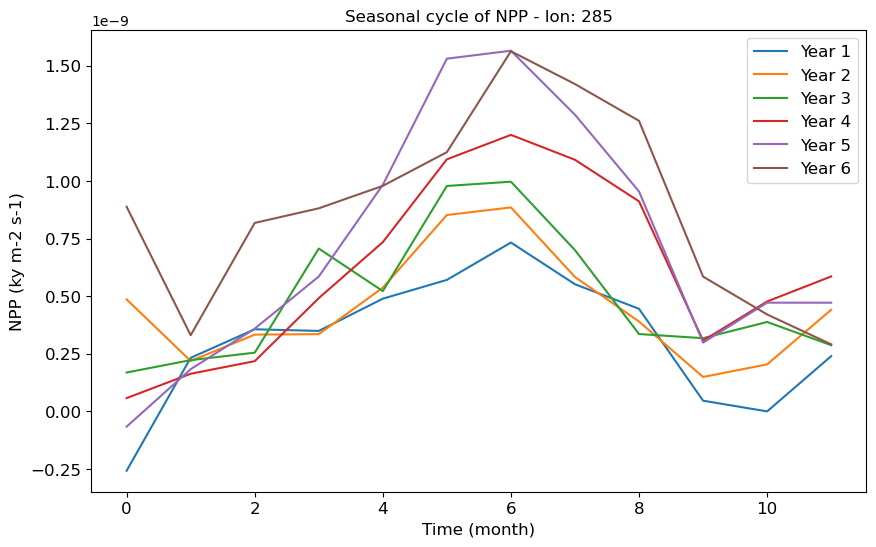

In [10]:
npp_pf = fates_def.FATES_NPP_PF
print(npp_pf.shape)

# subset by area and just get PFT 1
npp_pf = npp_pf[:,0,22,57]

print(npp_pf[0:12].shape)
print(npp_pf[13:25].shape)

fig3, ((f3ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(10,6))

### AGB
f3ax0.plot(npp_pf[0:12], label = 'Year 1')
f3ax0.plot(npp_pf[12:24], label = 'Year 2')
f3ax0.plot(npp_pf[24:36], label = 'Year 3')
f3ax0.plot(npp_pf[36:48], label = 'Year 4')
f3ax0.plot(npp_pf[48:60], label = 'Year 5')
f3ax0.plot(npp_pf[60:72], label = 'Year 6')
#f3ax0.plot(gpp_pf[72:84], label = 'Year 7')
#f3ax0.plot(gpp_pf[84:96], label = 'Year 8')
#f3ax0.plot(gpp_pf[96:108], label = 'Year 9')
#f3ax0.plot(gpp_pf[108:], label = 'Year 10')

f3ax0.set_title(r'Seasonal cycle of NPP - lon: 285', fontsize = 12)
f3ax0.set_ylabel('NPP (ky m-2 s-1)', fontsize = 12)
f3ax0.set_xlabel('Time (month)', fontsize=12)
f3ax0.tick_params(labelsize=12)
f3ax0.legend(prop={'size':12})


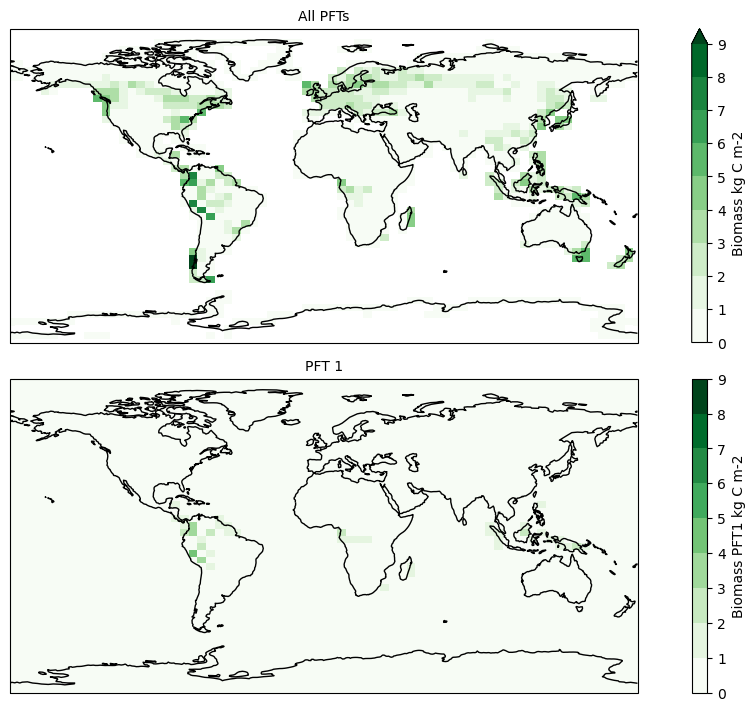

In [11]:
biomass_def = fates_def.FATES_VEGC.isel(time=slice(tave_start,tave_stop)).mean(dim='time')

# By PFT
vegc_sz_by_pft = fa.scpf_to_scls_by_pft(fates_def.FATES_VEGC_ABOVEGROUND_SZPF, fates_def)
vegc_def = vegc_sz_by_pft.sum(dim='fates_levscls')
vegc_tmean_def = vegc_def.isel(time=slice(tave_start,tave_stop)).mean(dim='time') 


fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(12,7), constrained_layout=True)

clevs = np.arange(0.,10,1)
axs=axs.flatten()

biomass_def.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Biomass kg C m-2"}, ax=axs[0])
axs[0].coastlines()
axs[0].set_title('All PFTs', fontsize=10)


vegc_tmean_def[0,:,:].plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Biomass PFT1 kg C m-2"}, ax=axs[1])
axs[1].coastlines()
axs[1].set_title('PFT 1', fontsize=10)


plt.savefig("Figures/hard_coded_tgrowth.png", format = 'png', dpi = 300, facecolor='white', edgecolor='white')
